### Chapter 1 Life

Who are the people or communities in need of help?

    Unemployment among young people is an ever-increasing monster staring us in the face, and nothing is being done to combat it.

What problem happened to them?
    
    The Unemployment situation has worsened recently as a result of the economic recession, which has resulted in the loss of many employment and the drying up of fresh prospects for those who remain unemployed. In the absence of a strong hand and adequate guidance, our youngsters will face adversities, which will have a negative influence on their future.

When did the problem take place?
    
    During the five years from 2010 to 2014, the Globe Bank gathered unemployment data from all across the world and compiled it into this little study.

Where did the problem take place?
    
    The data includes individual nations as well as nations grouped according to income level and supranational groups such as Arab World, EU etc. 

Why did the problem happen?
    
    The economy is not increasing at a fast rate because of a lack of investment and a slow expansion in the manufacturing sector, which produces the most employment.

### Chapter 2 Data

In [4]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/Users/prasanthdamarla/Downloads/SDV_Project/API_ILO_country_YU.csv')

In [7]:
data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [8]:
print("There are {} rows and {} columns".format(data.shape[0], data.shape[1]))

There are 219 rows and 7 columns


In [9]:
print("Columns are {}".format(data.columns))

Columns are Index(['Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014'], dtype='object')


In [10]:
non_country_list = [
    'Arab World', 'Central Europe and the Baltics', 'Caribbean small states',
    'East Asia & Pacific (excluding high income)',
    'Early-demographic dividend', 'East Asia & Pacific',
    'Europe & Central Asia (excluding high income)', 'Europe & Central Asia',
    'Euro area', 'European Union', 'Fragile and conflict affected situations',
    'High income', 'Heavily indebted poor countries (HIPC)', 'IBRD only',
    'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
    'Latin America & Caribbean (excluding high income)',
    'Latin America & Caribbean',
    'Least developed countries: UN classification', 'Low income',
    'Lower middle income', 'Low & middle income', 'Late-demographic dividend',
    'Middle East & North Africa', 'Middle income',
    'Middle East & North Africa (excluding high income)', 'North America',
    'OECD members', 'Other small states', 'Pre-demographic dividend',
    'Post-demographic dividend', 'South Asia',
    'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
    'Small states', 'East Asia & Pacific (IDA & IBRD countries)',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Middle East & North Africa (IDA & IBRD countries)',
    'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD countries)',
    'Upper middle income', 'World'
]

In [11]:
data_non_country = data[data['Country Name'].isin(non_country_list)]

In [12]:
data_non_country.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
29,Central Europe and the Baltics,CEB,24.558510,25.480771,26.322471,26.775459,24.326735
40,Caribbean small states,CSS,25.004050,23.858827,25.977574,26.477460,24.596775
48,East Asia & Pacific (excluding high income),EAP,11.001822,10.687960,10.891421,11.511484,11.790579
49,Early-demographic dividend,EAR,14.250746,14.180419,14.328332,14.223181,14.350504


In [13]:
index = data_non_country.index
data_country = data.drop(index)

In [14]:
data_country.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000
5,Argentina,ARG,19.500000,18.799999,18.400000,19.700001,21.299999


#### The box plot of all the individual countries for the 5 year duration 

In [15]:
x_data = ['2010', '2011', '2012', '2013', '2014']
y_data = [data_country['2010'], data_country['2011'], data_country['2012'], data_country['2013'], data_country['2014']]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)']

traces = []

for xd, yd, color in zip(x_data, y_data, colors):
    traces.append(go.Box(y=yd, name=xd, boxpoints='all', whiskerwidth=0.2, fillcolor=color, marker=dict(size=2, ), boxmean=True, line=dict(width=1),))

layout = go.Layout(
    title='Distribution of Unemployment Data',
    xaxis=dict(title='Year'),yaxis=dict(title='Unemployment Rate (%)', autorange=True, showgrid=True, zeroline=False, dtick=5, gridcolor='rgb(255, 255, 255)', gridwidth=1),
    margin=dict(l=40, r=30, b=80, t=100,),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

We can better understand the data if we use a box plot and scatter plot together. There is a clear trend in the data over time, with a mean of 18.285 percent from 2010 to 2014 and a range of 18.2546 percent. statistical plots such as box plots, scatter plots, etc. of data from certain countries and getting a fast look at how different countries compare against one another in terms of statistical analysis.

#### Comparison of the countries having unemployment rate

In [16]:
for year in ['2010', '2011', '2012', '2013', '2014']:
    l = []
    trace0 = go.Scatter(
            y= data_country[year],
            mode='markers',
            name='Unemployment (%)',
            marker= dict(size= data_country[year].values, line= dict(width=1), color= data_country[year].values,
                         opacity= 0.7, colorscale='Portland', showscale=True),
            text=data_country['Country Name'].values) 
    l.append(trace0);

    layout = go.Layout(
        title= f'Scatter plot of unemployment rates in {year}',
        hovermode= 'closest',
        xaxis= dict(ticklen= 5, zeroline= False, gridwidth= 2),
        yaxis=dict(title= 'Unemployment Rate (%)', ticklen= 5, gridwidth= 2),
        showlegend= False,
    )
    fig = go.Figure(data=l, layout=layout)
    py.iplot(fig)

Several nations, such as South Africa and Bosnia and Herzegovina, which were already experiencing high unemployment rates in 2010 are still among the countries with the highest jobless rates in 2014. The situation in several European nations, on the other hand, has worsened with time.

#### Countries wise Best & Worst Performers

In [17]:
data_country['2014-2010 change'] = data_country['2014'] - data_country['2010']

In [18]:
def top_successful_1(df, n=10, column='2014-2010 change'):
    return df.sort_values(by=column, ascending=True).head(n)


def top_failure_1(df, n=10, column='2014-2010 change'):
    return df.sort_values(by=column, ascending=False).head(n)


top15 = top_successful_1(data_country, n=15)
bottom15 = top_failure_1(data_country, n=15)

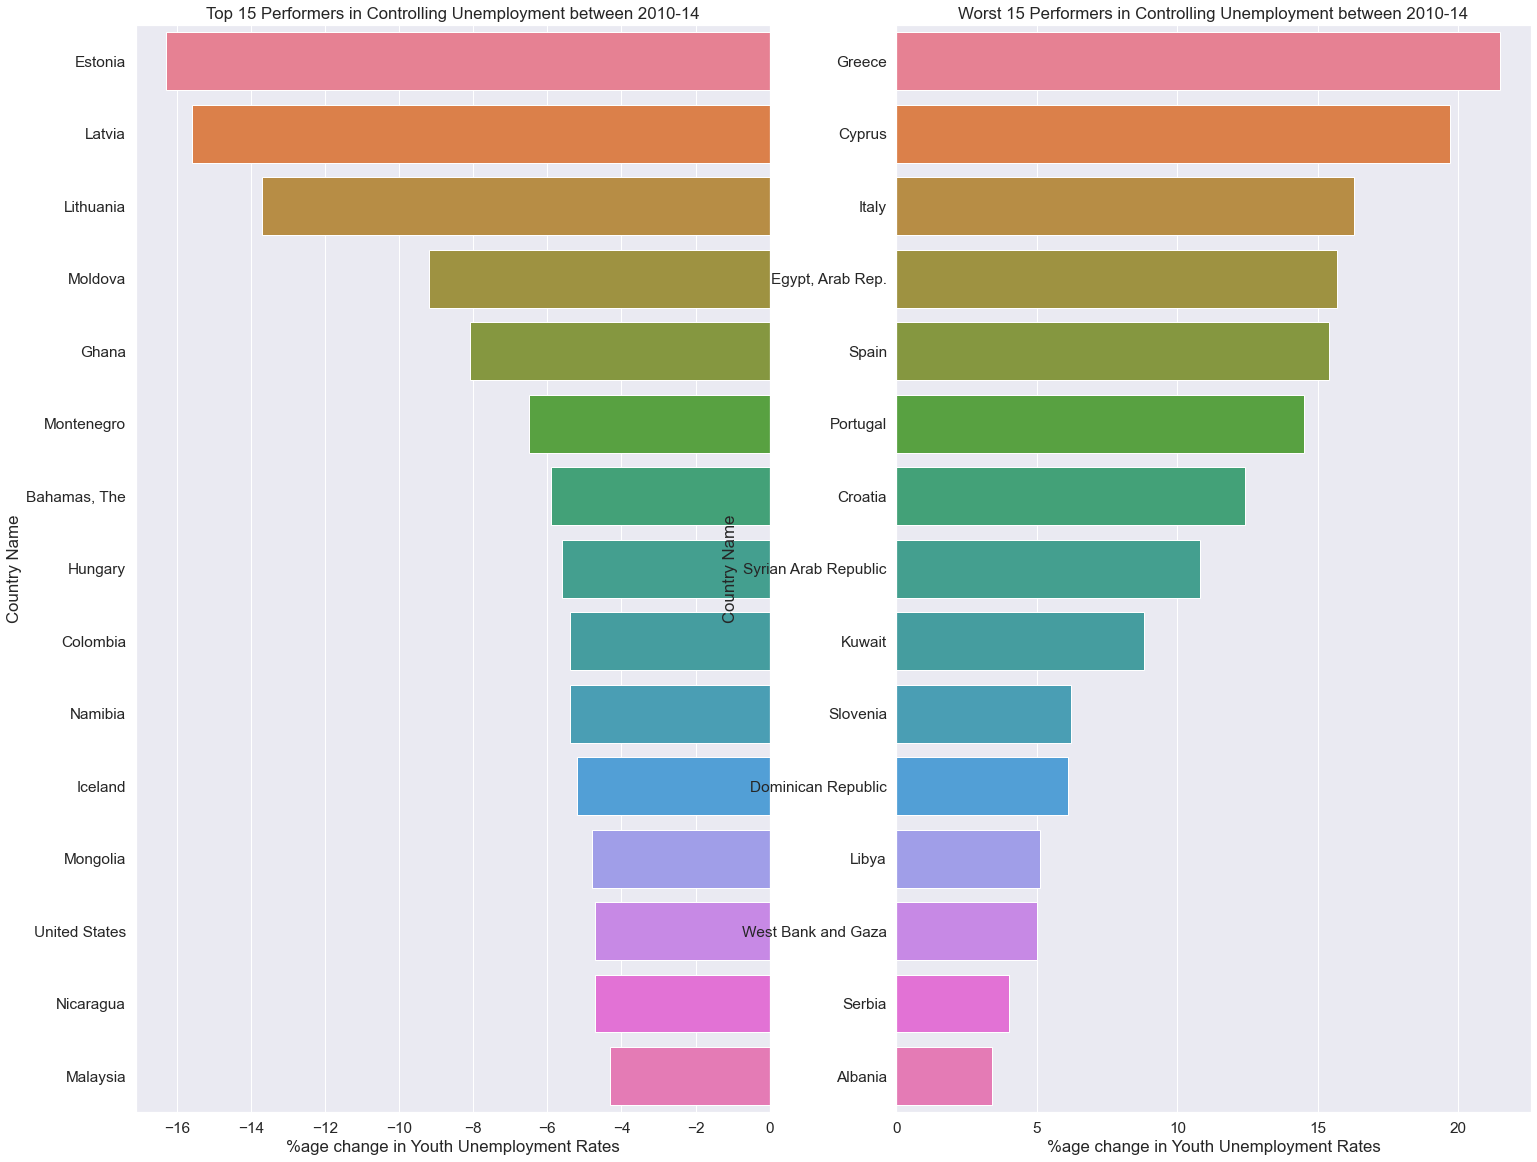

In [19]:
sns.set(font_scale=1.4)
fig, axes = plt.subplots(1, 2, figsize=(25, 20))
colorspal = sns.color_palette('husl', len(top15['2014']))
sns.barplot(top15['2014-2010 change'],
            top15['Country Name'],
            palette=colorspal,
            ax=axes[0])
sns.barplot(bottom15['2014-2010 change'],
            bottom15['Country Name'],
            palette=colorspal,
            ax=axes[1])
axes[0].set(
    xlabel='%age change in Youth Unemployment Rates',
    title='Top 15 Performers in Controlling Unemployment between 2010-14')
axes[1].set(
    xlabel='%age change in Youth Unemployment Rates',
    title='Worst 15 Performers in Controlling Unemployment between 2010-14')
plt.show()

A bar graph on the left displays the top 15 nations in terms of how well they dealt with unemployment between 2010 and 2014. Most of these nations are located in Europe, with the exception of Estonia, which had a negative growth rate of -16.29 percent despite having an unemployment rate of 17 percent, which is still greater than most other countries in the region. Estonia, Latvia, Lithuania, Moldova, and Ghana round out the top five.

#### unemployment growth around globe in 5 years

In [20]:
data = [
    dict(
        type='choropleth',
        locations=data_country['Country Code'],
        z=data_country['2014-2010 change'],
        text=data_country['Country Name'],
        colorscale='RdBu',
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
        colorbar=dict(autotick=False, title='Unemployment (%)'),
    )
]

layout = dict(
    title='unemployment growth around globe in 5 years',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        showocean=True,
        oceancolor='rgb(222,243,246)',
        
        projection=dict(type='Mercator')))

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world2010')

Most nations studied had either a minor positive increase or a net drop in unemployment rates over the five-year period from 2010 to 2014. The remainder of the globe seems to be doing quite well, other from few North African and Southern European countries that have suffered a significant rise in unemployment. Just 0.19 percent, 1.5 percent, and 1.7 percent growth in India, China, and Australia over the last five years shows that the South Asian and Oceania area is performing well.

#### Non Country Data Analysis

In [21]:
superNationalCountry = [
    'Arab World', 'Caribbean small states', 'East Asia & Pacific',
    'European Union', 'Latin America & Caribbean',
    'Middle East & North Africa', 'North America', 'OECD members',
    'Other small states', 'South Asia', 'Sub-Saharan Africa', 'World'
]

In [22]:
data_superNational = data_non_country[data_non_country['Country Name'].isin(
    superNationalCountry)]

In [23]:
data_superNational = data_superNational[[
    'Country Name', '2010', '2011', '2012', '2013', '2014'
]]

In [24]:
data_superNational.head()

,Country Name,2010,2011,2012,2013,2014
3,Arab World,25.022214,28.117516,29.113212,29.335306,29.704569
40,Caribbean small states,25.004050,23.858827,25.977574,26.477460,24.596775
50,East Asia & Pacific,10.925130,10.586137,10.754695,11.296945,11.570405
60,European Union,22.158531,22.793596,25.032586,25.717269,25.116139
110,Latin America & Caribbean,15.133833,14.433149,13.695386,13.392317,14.030340


In [25]:
data_superNational = data_superNational.set_index('Country Name')
data_superNational = (data_superNational.T).copy()

In [26]:
data_superNational.head()

Country Name,Arab World,Caribbean small states,East Asia & Pacific,European Union,Latin America & Caribbean,Middle East & North Africa,North America,OECD members,Other small states,South Asia,Sub-Saharan Africa,World
2010,25.022214,25.004050,10.925130,22.158531,15.133833,25.923886,18.327923,17.246635,24.259008,9.943293,14.652529,13.784957
2011,28.117516,23.858827,10.586137,22.793596,14.433149,28.712132,17.086946,16.764668,23.537174,9.995087,14.523908,13.714673
2012,29.113212,25.977574,10.754695,25.032586,13.695386,29.650675,16.291651,17.085444,22.874889,10.270674,14.503699,13.874293
2013,29.335306,26.477460,11.296945,25.717269,13.392317,29.933500,15.610488,16.923819,23.211869,10.189717,14.050604,13.903832
2014,29.704569,24.596775,11.570405,25.116139,14.030340,30.403553,13.943100,16.408321,23.321337,10.251149,14.124300,13.987184


In [27]:
traces = []

for i in range(len(superNationalCountry)):
    traces.append(go.Scatter(x=data_superNational.index,
                             y=data_superNational.iloc[:, i], name=superNationalCountry[i], mode='lines+markers', line=dict(width=3, dash='dashdot')))

layout = go.Layout(
    title='Unemployment Over the Years in different Regions of the World',
    yaxis=dict(title='Unemployment Rate (%)', zeroline=True, showline=True, showgrid=False, showticklabels=True, linecolor='rgb(0,0,0)',
               linewidth=2, tickmode='auto', tickwidth=2, ticklen=5, nticks=8, tickfont=dict(family='Arial', size=12, color='rgb(82, 82, 82)'),
               ticks='outside'),
    xaxis=dict(title='Years', showline=True, showgrid=False, showticklabels=True, linecolor='rgb(0,0,0)',
               linewidth=2, tickwidth=2, ticklen=5, tickfont=dict(family='Arial', size=12, color='rgb(82, 82, 82)'),
               ticks='outside', tickmode='array', tickvals=['2009', '2010', '2011', '2012', '2013', '2014', '2015']))

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

As can be seen from the graphs above, Asian countries (East Asia & Pacific, South Asia & Latin America) have lower unemployment rates than the global average. This serves as a basis for comparison. Economic crisis that has been particularly painful for countries in the European Union and the Middle East appears to be strengthening the argument that emerging countries are propelling the global economy ahead rather than their wealthier counterparts.

In [28]:
incomeGroup = [
    'High income', 'Heavily indebted poor countries (HIPC)',
    'Least developed countries: UN classification', 'Low income',
    'Lower middle income', 'Low & middle income', 'Middle income',
    'Upper middle income', 'World'
]

In [29]:
dataIncome = data_non_country[data_non_country['Country Name'].isin(
    incomeGroup)]

In [30]:
dataIncome = dataIncome[['Country Name', '2010', '2011', '2012', '2013', '2014']]
dataIncome = dataIncome.set_index('Country Name')
dataIncome = (dataIncome.T).copy()

In [31]:
dataIncome.head()

Country Name,High income,Heavily indebted poor countries (HIPC),Least developed countries: UN classification,Low income,Lower middle income,Low & middle income,Middle income,Upper middle income,World
2010,18.517204,11.676580,11.406600,10.385377,13.061031,13.144880,13.453677,13.918079,13.784957
2011,18.184176,11.631835,11.452909,10.421061,13.128082,13.110829,13.422218,13.779605,13.714673
2012,18.653569,11.488855,11.431832,10.405270,13.231023,13.228547,13.568301,13.992812,13.874293
2013,18.589113,11.057185,11.407369,10.216408,13.320711,13.269025,13.651924,14.086227,13.903832
2014,17.831892,11.124920,11.458322,10.229319,13.384825,13.467008,13.890205,14.581009,13.987184


In [32]:
traces = []

for i in range(len(incomeGroup)):
    traces.append(go.Scatter(x=dataIncome.index,
                             y=dataIncome.iloc[:, i], name=incomeGroup[i], mode='lines+markers', line=dict(width=3, dash='dashdot')))

layout = go.Layout(
    title='Unemployment Over the Years among Various Income Groups',
    yaxis=dict(title='Unemployment Rate (%)', zeroline=True, showline=True, showgrid=False, showticklabels=True, linecolor='rgb(0,0,0)',
               linewidth=2, tickmode='auto', tickwidth=2, ticklen=5, nticks=8, tickfont=dict(family='Arial', size=12, color='rgb(82, 82, 82)'),
               ticks='outside'),
    xaxis=dict(title='Years', showline=True, showgrid=False, showticklabels=True, linecolor='rgb(0,0,0)',
               linewidth=2, tickwidth=2, ticklen=5, tickfont=dict(family='Arial', size=12, color='rgb(82, 82, 82)'),
               ticks='outside', tickmode='array', tickvals=['2009', '2010', '2011', '2012', '2013', '2014', '2015']))

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

Based on the nation's income levels, the world's unemployment rates are compared to those in each country. While less developed and emerging nations are able to provide more job chances and limit unemployment rates from growing, high-income countries suffer from greater unemployment rates. This is evident from the scatter plot.

### Chapter 3 Users

Who: the main character is the targeted user or audience?

    Targeted user is the main character. The analysis showing clear understanding and insights into the unemployment across the world.

What can the application do? What does the visualization show?

    an exploratory analysis of the data by producing numerous simple statistical plots such as box plots, scatter plots etc. of the data from specific nations and taking a quick glimpse at how the various countries compare against one another.

When can the user use the application/visualization?

    User can use this visualization whenever user wants to understand the problem of unemployment and how to solve the problem. This visualization will help to get more insights into the data.

Where will the visualization and applications be deployed, for example, mobile phones, the web
etc.?
        
    The application can be deployed as web application so that the dynamic graphs will give good insights on the data. It will give the access to try different types of analysis.

Why is the visualization or application useful to the user?

    Data visualization helps to tell stories by curating data into a form easier to understand, highlighting the trends and outliers. A good visualization tells a story, removing the noise from data and highlighting the useful information.